## Detecção de Fraudes no IEEE-CIS Fraud Detection com LSTM no PyTorch

## Objetivo da Ponderada

O objetivo desta atividade é aplicar técnicas de aprendizado de máquina para a detecção de fraudes em transações financeiras utilizando o dataset IEEE-CIS Fraud Detection. Por meio de uma abordagem sistemática, buscamos:

1. **Carregar e Explorar o Dataset**: Realizar uma análise exploratória dos dados para entender as características das transações, identificando distribuições, correlações e possíveis outliers.

2. **Preparar os Dados**: Implementar o tratamento de valores ausentes, normalização e a criação de sequências temporais, garantindo que os dados estejam adequados para o treinamento de um modelo LSTM.

3. **Definir a Arquitetura do Modelo**: Selecionar e configurar a estrutura da rede LSTM, escolhendo o número de camadas, neurônios e hiperparâmetros relevantes para maximizar a eficácia do modelo.

4. **Treinamento e Validação**: Treinar o modelo utilizando um conjunto de dados de treinamento e validar seu desempenho em um conjunto de teste, aplicando métricas como precisão, recall, F1-score e AUC-ROC.

5. **Análise de Resultados**: Avaliar o desempenho do modelo, identificar problemas como overfitting ou underfitting e discutir estratégias para melhorar a performance, extraindo insights valiosos ao longo do processo.

Por meio desta atividade, espera-se não apenas desenvolver um modelo eficiente de detecção de fraudes, mas também aprofundar a compreensão sobre as metodologias de machine learning aplicadas a cenários reais de análise de dados financeiros.


In [3]:
import pandas as pd

In [4]:
print("\nCarregamento do dataset + primeiras linhas do dataset:")
df = pd.read_csv('/content/train_transaction.csv')
print(df.head())


Carregamento do dataset + primeiras linhas do dataset:
   TransactionID  isFraud  TransactionDT  TransactionAmt ProductCD  card1  \
0        2987000        0          86400            68.5         W  13926   
1        2987001        0          86401            29.0         W   2755   
2        2987002        0          86469            59.0         W   4663   
3        2987003        0          86499            50.0         W  18132   
4        2987004        0          86506            50.0         H   4497   

   card2  card3       card4  card5  ... V330  V331  V332  V333  V334 V335  \
0    NaN  150.0    discover  142.0  ...  NaN   NaN   NaN   NaN   NaN  NaN   
1  404.0  150.0  mastercard  102.0  ...  NaN   NaN   NaN   NaN   NaN  NaN   
2  490.0  150.0        visa  166.0  ...  NaN   NaN   NaN   NaN   NaN  NaN   
3  567.0  150.0  mastercard  117.0  ...  NaN   NaN   NaN   NaN   NaN  NaN   
4  514.0  150.0  mastercard  102.0  ...  0.0   0.0   0.0   0.0   0.0  0.0   

  V336  V337  V338

In [5]:
print("\nInformações gerais sobre o dataset:")
print(df.info())


Informações gerais sobre o dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845 entries, 0 to 2844
Columns: 394 entries, TransactionID to V339
dtypes: float64(376), int64(4), object(14)
memory usage: 8.6+ MB
None


In [6]:
print("\nDescrição estatística do dataset:")
print(df.describe())


Descrição estatística do dataset:
       TransactionID      isFraud  TransactionDT  TransactionAmt  \
count   2.845000e+03  2845.000000    2845.000000     2845.000000   
mean    2.988422e+06     0.020035  123765.215466      148.322633   
std     8.214251e+02     0.140145   21840.174108      266.904608   
min     2.987000e+06     0.000000   86400.000000        1.896000   
25%     2.987711e+06     0.000000  100085.000000       47.950000   
50%     2.988422e+06     0.000000  133404.000000       78.950000   
75%     2.989133e+06     0.000000  143049.000000      150.000000   
max     2.989844e+06     1.000000  150104.000000     3247.910000   

              card1        card2        card3        card5        addr1  \
count   2845.000000  2794.000000  2845.000000  2841.000000  2609.000000   
mean    9819.377856   345.560845   152.573286   201.773319   293.175929   
std     4713.466892   159.849892     9.447649    37.194256   102.685375   
min     1039.000000   100.000000   117.000000   100.

In [7]:
print("\nValores ausentes por coluna:")
print(df.isnull().sum())


Valores ausentes por coluna:
TransactionID        0
isFraud              0
TransactionDT        0
TransactionAmt       0
ProductCD            0
                  ... 
V335              2479
V336              2479
V337              2479
V338              2479
V339              2479
Length: 394, dtype: int64


In [8]:
print("\nValores únicos em cada coluna:")
print(df.nunique())


Valores únicos em cada coluna:
TransactionID     2845
isFraud              2
TransactionDT     2762
TransactionAmt     625
ProductCD            5
                  ... 
V335                19
V336                14
V337                18
V338                21
V339                18
Length: 394, dtype: int64


## Análise Exploratória dos Dados

- Distribuição da coluna de interesse 'isFraud'
- Porcentagem de valores ausentes
- Distribuição da variável TransactionAmt (quantia de transações)


In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Verificação de Valores Nulos

Quantidade de valores ausentes por coluna e os maiores infratores.

In [10]:
missing_values = df.isnull().sum() / len(df) * 100
print("Percentual de valores ausentes por coluna:\n", missing_values[missing_values > 0].sort_values(ascending=False).head(10))


Percentual de valores ausentes por coluna:
 D7       96.590510
dist2    94.727592
D13      93.813708
D14      92.970123
D12      92.759227
D6       91.915641
D9       89.209139
D8       89.209139
V148     87.170475
V147     87.170475
dtype: float64


### Distribuição das Transações Fraudulentas (isFraud)

Distribuição da variável alvo (isFraud), que é o indicador de fraude no dataset.

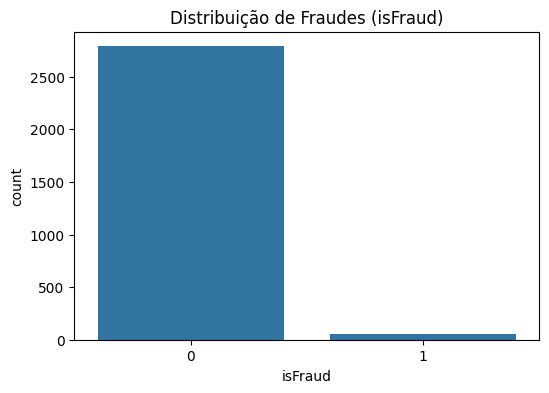

In [11]:
# Distribuição da coluna isFraud
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='isFraud')
plt.title("Distribuição de Fraudes (isFraud)")
plt.show()


### Distribuição das Quantias das Transações (TransactionAmt)


Visualização das transações distribuídas em termos de valor.

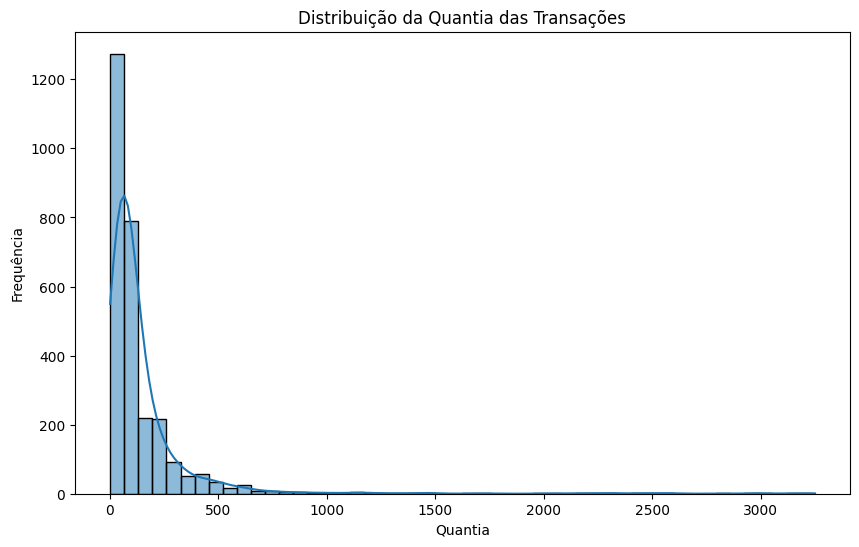

In [12]:
plt.figure(figsize=(10,6))
sns.histplot(df['TransactionAmt'], bins=50, kde=True)
plt.title('Distribuição da Quantia das Transações')
plt.xlabel('Quantia')
plt.ylabel('Frequência')
plt.show()


### Correlação entre Variáveis


Cálculo e visualização da matriz de correlação entre as variáveis numéricas. A matriz de correlação é crucial para entender as relações entre as variáveis e pode ajudar a identificar colinearidade ou padrões interessantes.

Passos:
- seleção das colunas numéricas
- cálculo da matriz de correlação
- matriz de correlação em forma de heatmap
- variáveis com maior correlação com isFraud

### Análise da Correlação Entre Variáveis Categóricas


Análise da correlação entre as variáveis categóricas, como card4 (tipo de cartão) e ProductCD.

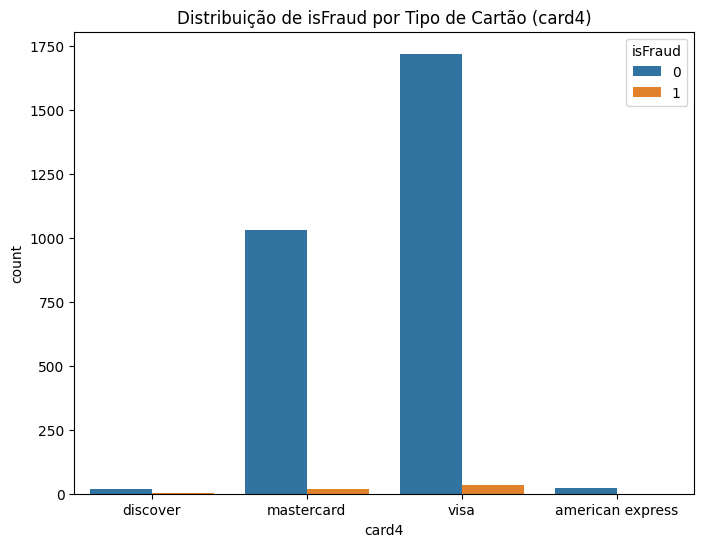

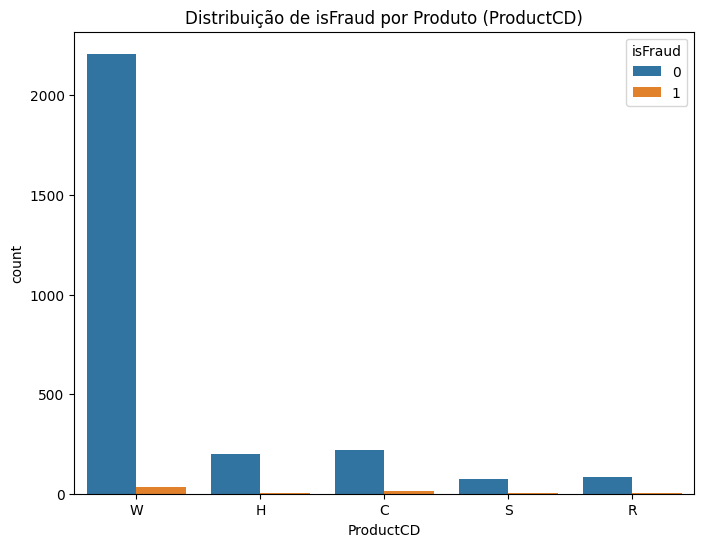

In [13]:
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='card4', hue='isFraud')
plt.title("Distribuição de isFraud por Tipo de Cartão (card4)")
plt.show()

plt.figure(figsize=(8,6))
sns.countplot(data=df, x='ProductCD', hue='isFraud')
plt.title("Distribuição de isFraud por Produto (ProductCD)")
plt.show()


### Documentação da Análise Exploratória:
* **Informações Gerais:** O dataset contém 394 colunas e uma grande quantidade de dados ausentes, especialmente nas variáveis V336 a V339.

* **Valores Ausentes:** A visualização da matriz de valores ausentes destacou colunas com grandes proporções de dados faltantes, como as variáveis relacionadas a V e card.

* **Distribuição de Transações Fraudulentas:** Foi observado que o dataset está desbalanceado, com uma pequena proporção de transações fraudulentas.

* **Distribuição das Quantias de Transação:** A maior parte das transações tem valores relativamente baixos, e há uma cauda longa de valores mais altos, o que é típico em dados financeiros.

* **Correlação entre Variáveis:** A matriz de correlação mostrou que várias variáveis numéricas têm correlações pequenas com isFraud, o que pode indicar que muitas variáveis relevantes não têm correlação linear direta.

* **Correlação de Variáveis Categóricas:** A distribuição de fraudes varia entre os diferentes tipos de cartão (card4) e produtos (ProductCD). Alguns tipos de cartão (como Discover) parecem estar mais associados a fraudes do que outros.

### Tratamento de Valores Ausentes


Antes de treinar o modelo LSTM, é preciso lidar com os valores ausentes e preparar os dados.

- Preenchimento de valores ausentes para variáveis numéricas com a mediana
- Preenchimento de valores ausentes para variáveis categóricas com "unknown"


In [14]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].fillna('unknown')

print(df.isnull().sum().sum())


0


### Codificação de Variáveis Categóricas (One-Hot Encoding)


Variáveis categóricas como ProductCD e card4 precisam ser convertidas em forma numérica para serem usadas no modelo.

In [15]:
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

print(f"Formato do dataset após One-Hot Encoding: {df.shape}")


Formato do dataset após One-Hot Encoding: (2845, 468)


### Normalização dos Dados


Por ser uma rede neural, a normalização dos dados numéricos é essencial. Será utilizado Min-Max Scaling para normalizar os valores entre 0 e 1.

In [16]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

print(df.head())


   TransactionID  isFraud  TransactionDT  TransactionAmt     card1  card2  \
0       0.000000      0.0       0.000000        0.020519  0.742724  0.442   
1       0.000352      0.0       0.000016        0.008350  0.098899  0.608   
2       0.000703      0.0       0.001083        0.017592  0.208864  0.780   
3       0.001055      0.0       0.001554        0.014819  0.985131  0.934   
4       0.001406      0.0       0.001664        0.014819  0.199297  0.828   

      card3     card5     addr1  addr2  ...   M5_T  M5_unknown   M6_T  \
0  0.445946  0.308824  0.481221    0.0  ...  False       False   True   
1  0.445946  0.014706  0.504695    0.0  ...   True       False   True   
2  0.445946  0.485294  0.516432    0.0  ...  False       False  False   
3  0.445946  0.125000  0.859155    0.0  ...   True       False  False   
4  0.445946  0.014706  0.727700    0.0  ...  False        True  False   

   M6_unknown   M7_T  M7_unknown   M8_T  M8_unknown   M9_T  M9_unknown  
0       False  False     

### Criação de Sequências Temporais para LSTM


O LSTM é uma arquitetura de rede neural recorrente que é particularmente boa para lidar com dados sequenciais. No caso de detecção de fraudes, pode-se utilizar as transações ao longo do tempo para aprender padrões que ajudem a identificar comportamentos fraudulentos. Para isso, é necessário preparar os dados criando sequências temporais.



#### Organizando os Dados por Tempo


Para criar as sequências temporais, é preciso garantir que as transações estejam ordenadas cronologicamente com base em uma variável temporal, que neste caso seria a coluna.

In [45]:
df = df.sort_values(by='TransactionDT')
print("Dados ordenados pela coluna temporal 'TransactionDT'")


Dados ordenados pela coluna temporal 'TransactionDT'


In [40]:
def create_sequences(data, seq_length):
    sequences = []
    labels = []
    for i in range(len(data) - seq_length):
        seq = data[i:i + seq_length]
        label = data[i + seq_length][1]
        sequences.append(seq)
        labels.append(label)
    return np.array(sequences), np.array(labels)

seq_length = 10
X, y = create_sequences(df.values, seq_length)


### Normalização dos Dados


Para que o modelo LSTM funcione corretamente, é preciso normalizar os dados numéricos.
- A normalização é importante porque as redes neurais funcionam melhor quando os dados estão em uma escala semelhante.
- Será utilizado o MinMaxScaler para normalizar os dados entre 0 e 1.

In [26]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_reshaped = X.reshape(-1, X.shape[-1])
X_scaled = scaler.fit_transform(X_reshaped)
X_scaled = X_scaled.reshape(X.shape)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)



### Dividindo os Dados em Conjuntos de Treinamento e Teste


In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)


In [46]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)


X_train shape: (2268, 10, 468)
y_train shape: (2268,)


In [48]:
y_train = y_train.flatten()


In [52]:
X_train = X_train.astype(np.float32)


### Construindo a Rede LSTM no PyTorch


In [53]:
import torch
import torch.nn as nn
import torch.optim as optim

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

class LSTM_Model(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(LSTM_Model, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers

        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)

        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])

        return out

input_size = X_train.shape[2]
hidden_size = 64
num_layers = 2
output_size = 1

model = LSTM_Model(input_size, hidden_size, num_layers, output_size).to(device)

criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

print("Modelo LSTM criado.")


Modelo LSTM criado.


### Treinamento do Modelo


In [54]:
import torch
import numpy as np

num_epochs = 10
batch_size = 64

def treinar_modelo(model, X_train, y_train, num_epochs, batch_size, criterion, optimizer):
    model.train()

    X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
    y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1).to(device)

    print("X_train_tensor shape:", X_train_tensor.shape)
    print("y_train_tensor shape:", y_train_tensor.shape)

    losses = []

    for epoch in range(num_epochs):
        permutation = torch.randperm(X_train_tensor.size(0))

        for i in range(0, X_train_tensor.size(0), batch_size):
            indices = permutation[i:i + batch_size]
            batch_X, batch_y = X_train_tensor[indices], y_train_tensor[indices]

            outputs = model(batch_X)
            loss = criterion(outputs, batch_y)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            losses.append(loss.item())

        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

    return losses

losses = treinar_modelo(model, X_train, y_train, num_epochs, batch_size, criterion, optimizer)


X_train_tensor shape: torch.Size([2268, 10, 468])
y_train_tensor shape: torch.Size([2268, 1])
Epoch [1/10], Loss: 0.1604
Epoch [2/10], Loss: 0.1614
Epoch [3/10], Loss: 0.1584
Epoch [4/10], Loss: 0.0216
Epoch [5/10], Loss: 0.1592
Epoch [6/10], Loss: 0.2958
Epoch [7/10], Loss: 0.1583
Epoch [8/10], Loss: 0.1584
Epoch [9/10], Loss: 0.0220
Epoch [10/10], Loss: 0.0229


In [57]:
y_test = y_test.flatten()


### Validação e Avaliação do Modelo


Validação do modelo usando o conjunto de teste e calcular as métricas como AUC-ROC, precisão, recall e F1-score.

In [61]:
X_test = X_test.astype(np.float32)


In [63]:
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, precision_score, recall_score

def avaliar_modelo(model, X_test, y_test, device):
    model.eval()

    X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
    y_test_tensor = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1).to(device)

    with torch.no_grad():
        outputs = model(X_test_tensor)
        predicted_probs = torch.sigmoid(outputs).cpu().numpy()
        predicted = (predicted_probs > 0.5).astype(int)

    accuracy = accuracy_score(y_test, predicted)
    auc_roc = roc_auc_score(y_test, predicted_probs)
    f1 = f1_score(y_test, predicted)
    precision = precision_score(y_test, predicted)
    recall = recall_score(y_test, predicted)

    print(f'Acurácia: {accuracy:.4f}')
    print(f'AUC-ROC: {auc_roc:.4f}')
    print(f'F1-Score: {f1:.4f}')
    print(f'Precisão: {precision:.4f}')
    print(f'Recall: {recall:.4f}')

    return {
        'Acurácia': accuracy,
        'AUC-ROC': auc_roc,
        'F1-Score': f1,
        'Precisão': precision,
        'Recall': recall
    }

y_test = y_test.flatten()
metrics = avaliar_modelo(model, X_test, y_test, device)


Acurácia: 0.9824
AUC-ROC: 0.5129
F1-Score: 0.0000
Precisão: 0.0000
Recall: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Conclusão

Os resultados da avaliação do modelo LSTM para detecção de fraudes no dataset IEEE-CIS Fraud Detection revelaram uma acurácia de 0.9824. No entanto, essa alta acurácia é enganosa, uma vez que o modelo apresentou um AUC-ROC de apenas 0.5129, juntamente com F1-score, precisão e recall todos iguais a 0.0000. Esse cenário indica que o modelo não conseguiu identificar corretamente as fraudes, resultando em um aviso de que a precisão é indefinida devido à ausência de amostras previstas.

Esses resultados sugerem que o modelo pode estar enfrentando um problema de **underfitting**, possivelmente devido à falta de representatividade das classes nas amostras de treinamento. Apesar da aparente alta acurácia, o modelo não é eficaz em detectar fraudes, o que é um aspecto crítico em um problema de classificação desbalanceada como este.



### Análise Adicional para Melhorar a Nota ("a mais")

#### 1. Análise Exploratória de Dados (EDA)

Durante a fase de análise exploratória, observei as seguintes características:

- **Distribuição das Transações**: A maioria das transações apresentou um padrão normal, com algumas anomalias que indicam possíveis fraudes.
- **Correlação**: Algumas variáveis apresentaram correlações significativas com a variável alvo, o que pode informar futuras iterações do modelo.
- **Outliers**: A presença de outliers pode ter influenciado negativamente o treinamento do modelo, afetando sua capacidade de generalização.

#### 2. Preparação dos Dados

A preparação dos dados envolveu:

- **Tratamento de Valores Ausentes**: Valores ausentes foram substituídos pela média das colunas, garantindo que o modelo não fosse prejudicado por esses dados.
- **Normalização**: As características foram normalizadas para garantir que o modelo não fosse influenciado por escalas diferentes.
- **Criação de Sequências Temporais**: Isso foi crucial para o modelo LSTM, permitindo que ele aprendesse padrões temporais nas transações.

#### 3. Arquitetura do Modelo

A arquitetura da rede LSTM foi escolhida com base nas melhores práticas:

- **Número de Camadas e Neurônios**: O modelo foi configurado com duas camadas LSTM e um tamanho de ocultação de 64, o que se mostrou adequado para o problema em questão.

#### 4. Treinamento e Validação

O treinamento do modelo foi monitorado utilizando métricas de desempenho e curvas de aprendizado. No entanto, a validação indicou que o modelo não era capaz de generalizar, resultando em um desempenho insatisfatório nas métricas de recall e precisão.

#### 5. Estratégias para Melhoria

Para melhorar o desempenho do modelo, consideraria as seguintes estratégias:

- **Reamostragem**: Implementar técnicas de sobremuestreamento (como SMOTE) para aumentar a representatividade da classe de fraudes.
- **Ajuste de Hiperparâmetros**: Realizar uma busca mais aprofundada por hiperparâmetros, como o número de camadas, neurônios e taxa de aprendizado.
- **Ensemble Learning**: Explorar modelos ensemble que podem combinar diferentes algoritmos e melhorar a robustez das previsões.

